<a href="https://colab.research.google.com/github/arukaff/Python/blob/main/12sem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

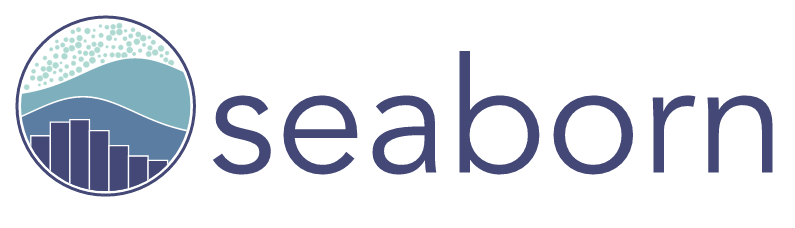

На уроке сегодня мы познакомимся с инструментами и способами визуализации данных с помощью библиотек **matplotlib** и **seaborn**. Прежде, чем приступать непосредственно к машинному обучению, важно произвести **EDA**(Exploratory Data Analysis) - Разведочный анализ данных.

Он состоит в анализе основных свойств данных, нахождения в них общих закономерностей, распределений и аномалий, построение начальных моделей, зачастую с использованием инструментов визуализации.

Понятие введено математиком **Джоном Тьюки**, который сформулировал цели такого анализа следующим образом:

1.   Максимальное «проникновение» в данные
2.   Выявление основных структур
3.   Выбор наиболее важных переменных
4.   Обнаружение отклонений и аномалий
5.   Проверка основных гипотез


In [1]:
# Библиотека для работы с табличными данными
import pandas as pd
# Библиотека для вычислений линейной алгебры
import numpy as np
# Библиотеки для визуализации
import seaborn as sns
import matplotlib.pyplot as plt


In [34]:
# Начнем с чтения csv данных
df = pd.read_csv('sample_data/california_housing_train.csv')

In [3]:
# Первые пять строк
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -114.31     34.19                15.0       5612.0          1283.0   
1    -114.47     34.40                19.0       7650.0          1901.0   
2    -114.56     33.69                17.0        720.0           174.0   
3    -114.57     33.64                14.0       1501.0           337.0   
4    -114.57     33.57                20.0       1454.0           326.0   

   population  households  median_income  median_house_value  
0      1015.0       472.0         1.4936             66900.0  
1      1129.0       463.0         1.8200             80100.0  
2       333.0       117.0         1.6509             85700.0  
3       515.0       226.0         3.1917             73400.0  
4       624.0       262.0         1.9250             65500.0

# Изображаем статистические отношения
## **Scatterplot** (Точечный график)

Математическая диаграмма, изображающая значения двух переменных в виде точек на декартовой плоскости.

Библиотека **seaborn** без труда принимает **pandas** DataFrame(таблицу). Чтобы изобразить отношения между двумя столбцами достаточно указать, какой стобец отоброзить по оси **x**, а какой по оси **y**

<Axes: xlabel='longitude', ylabel='latitude'>

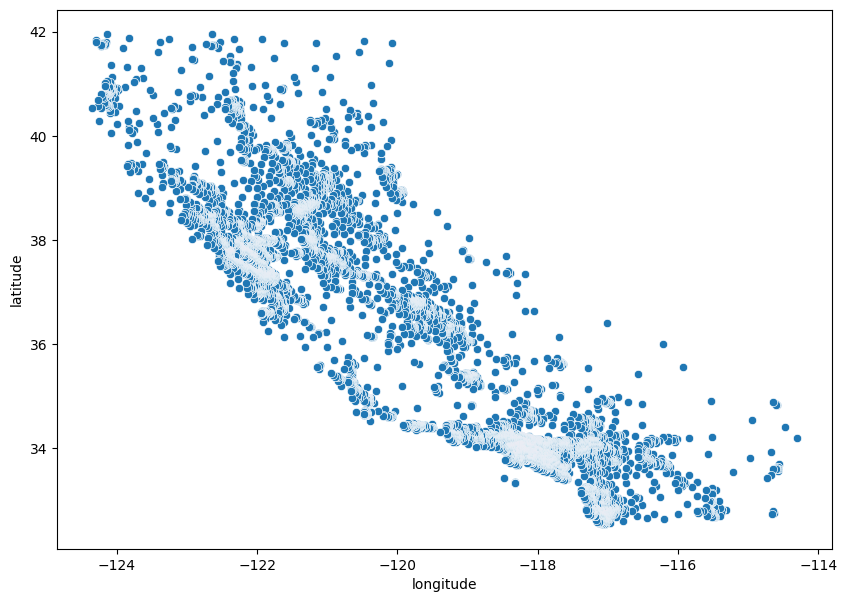

In [4]:
# Изображения точек долготы по отношению к широте.
# Можно заметить, что дома расположены в определенной "полосе" долготы и широты
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df, x="longitude", y="latitude")


<Axes: xlabel='households', ylabel='population'>

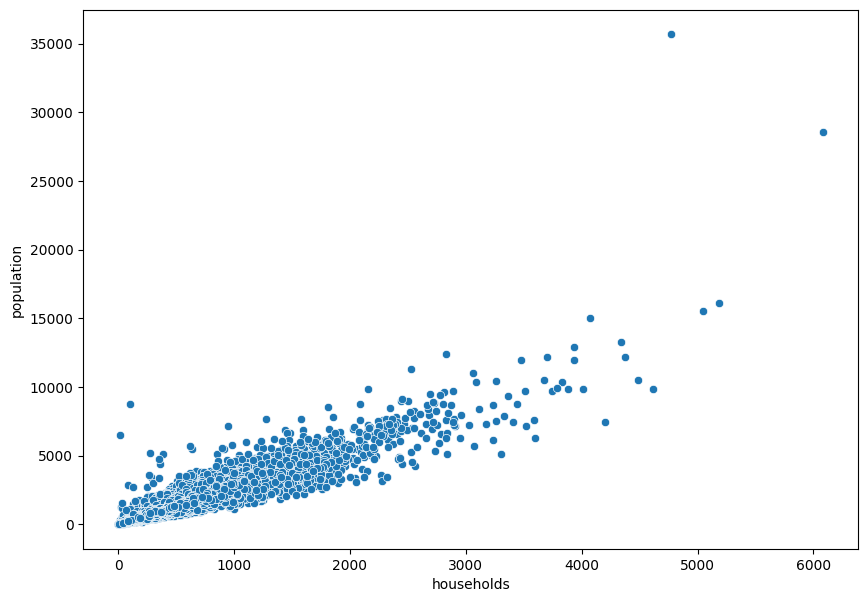

In [6]:
# Самостоятельная работа №1
# Изобразите отношение households к population
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df, x="households", y="population")


Помимо двумерных отношений, мы можем добавить "дополнительное измерение" с помощью цвета. В данном случае опять же достаточно очевидное отношение, чем выше кол-во семей, тем выше кол-во людей и соответвтственно комнат

<Axes: xlabel='households', ylabel='population'>

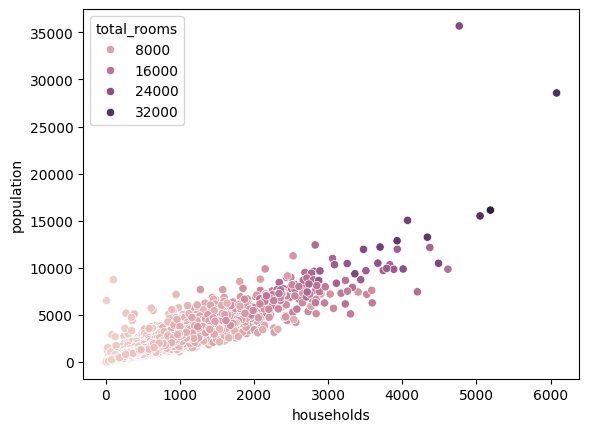

In [7]:
sns.scatterplot(data=df, x="households", y="population",  hue="total_rooms")

<Axes: xlabel='households', ylabel='population'>

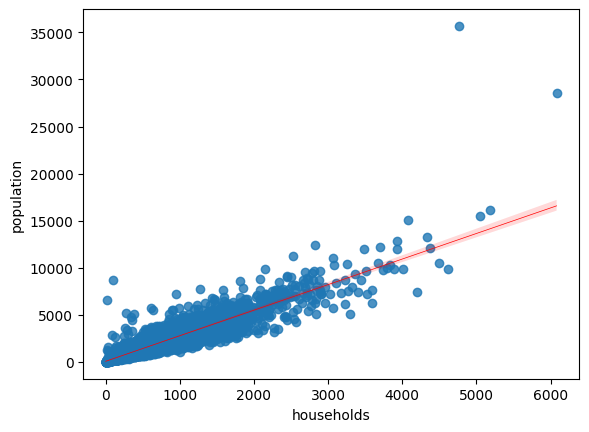

In [8]:
sns.regplot(data=df, x="households", y="population", line_kws={"color": "red", "linewidth": 0.5})



создаем график рассеяния с  линией тренда для данных из столбцов "households" и "population".


Помимо обозначения дополнительного измерения цветом мы можем использовать **size**

<Axes: xlabel='households', ylabel='population'>

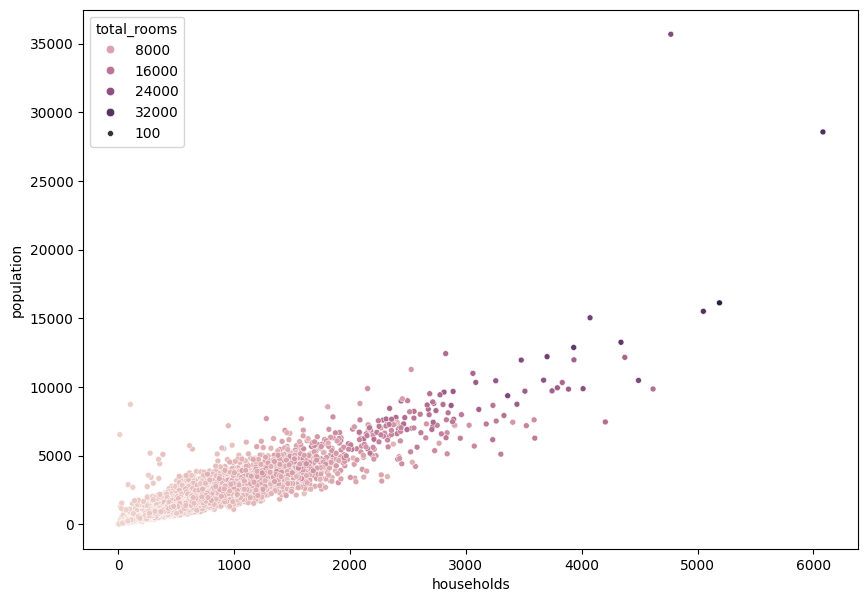

In [12]:
# Самостоятельная работа №2
# Добавьте total_rooms используя дополнительное измерение size
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df, x="households", y="population", hue='total_rooms', size=100)


Мы можем визуализировать сразу несколько отношений используя класс **PairGrid** внутри **seaborn**

**PairGrid** принимает как аргумент pandas **DataFrame** и визуализирует все возможные отношения между ними, в соответствии с выбранным типом графика.

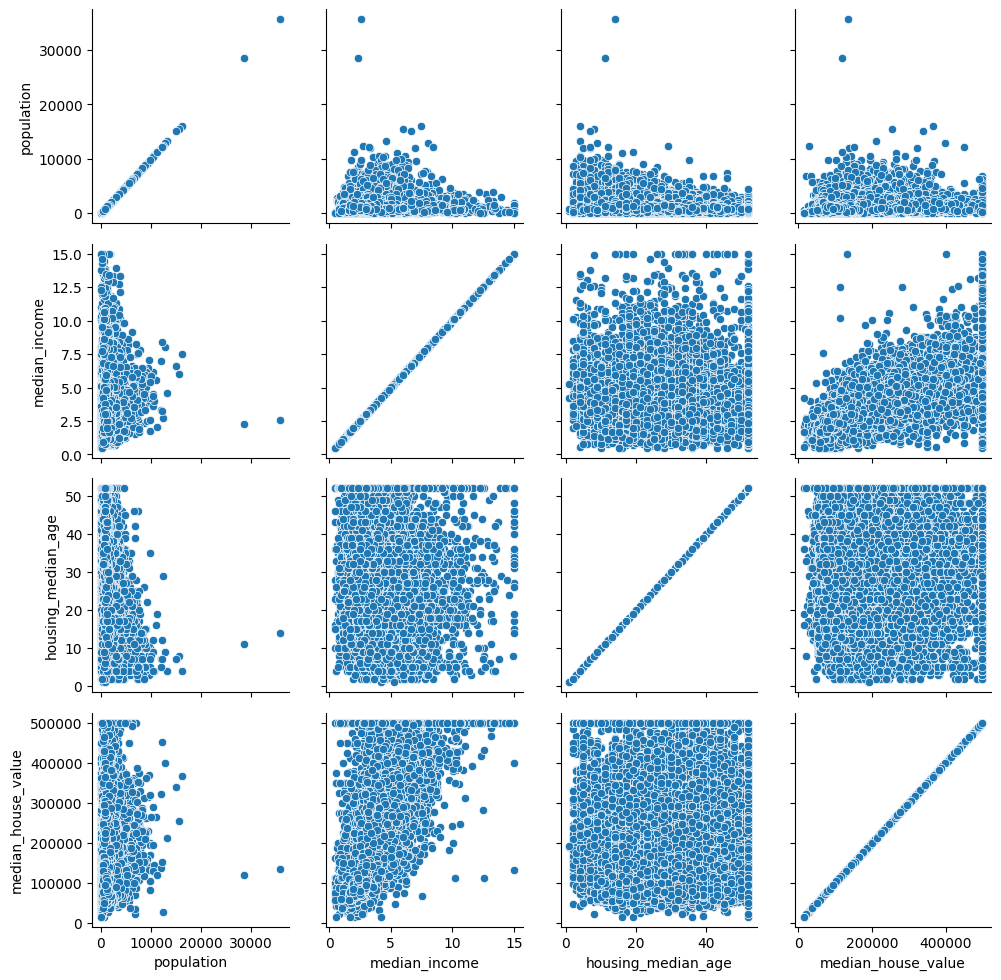

In [13]:
cols = ['population', 'median_income', 'housing_median_age', 'median_house_value']
g = sns.PairGrid(df[cols])
g.map(sns.scatterplot)

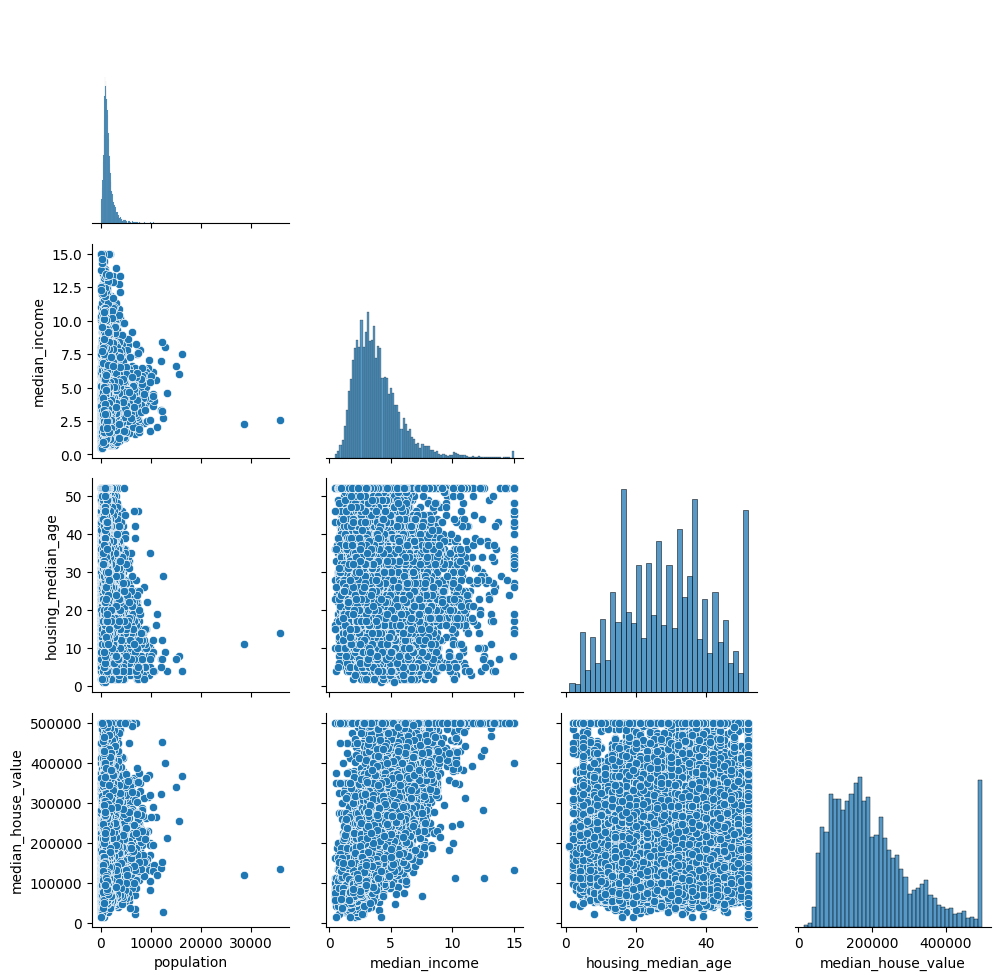

In [14]:
cols = ['population', 'median_income', 'housing_median_age', 'median_house_value']

g = sns.PairGrid(df[cols], corner=True)

g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

Как вы думаете, чем вызвана линейная зависимость по диагонали?

## Линейные графики
Хорошо подойдут, если есть временная или кака-либо иная последовательность и значения, которые могум меняться в зависимости от неё.

Для генерации линейных графиков в **seaborn** используется **relplot** функция.
Она также принимает **DataFrame**, **x**, **y** - столбцы.

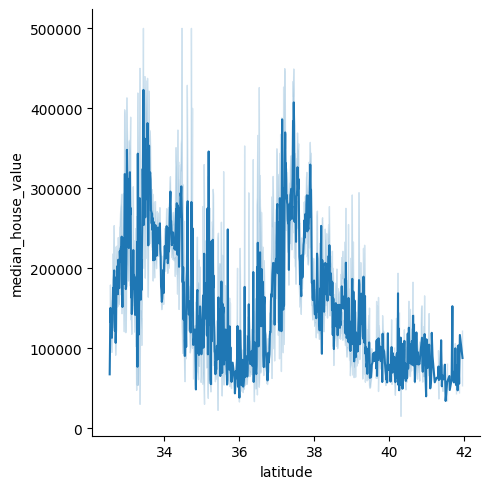

In [15]:
# Для визуализации выбирается тип line
sns.relplot(x="latitude", y="median_house_value", kind="line", data=df)

Можно видеть, что в определеных местах долготы цена за дома резко подскакивает

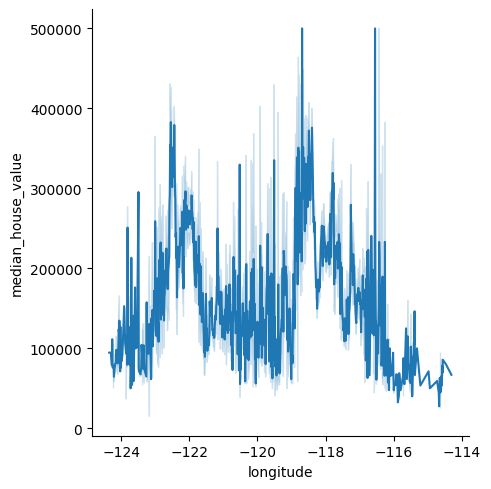

In [16]:
# Самостоятельная работа №3
# Визуализировать longitude по отношения к median_house_value
# Используя линейный график
sns.relplot(x="longitude", y="median_house_value", kind="line", data=df)

Можно видеть, что в определеных местах широты цена за дома также очень высока

Используя точечный график можно визуализировать эти отношения с большей четкостью. Скорее всего резкий рост цен связан с близостью к ценному объекту, повышающему качество жизни, скорее всего побережью океана или реки.

<Axes: xlabel='latitude', ylabel='longitude'>

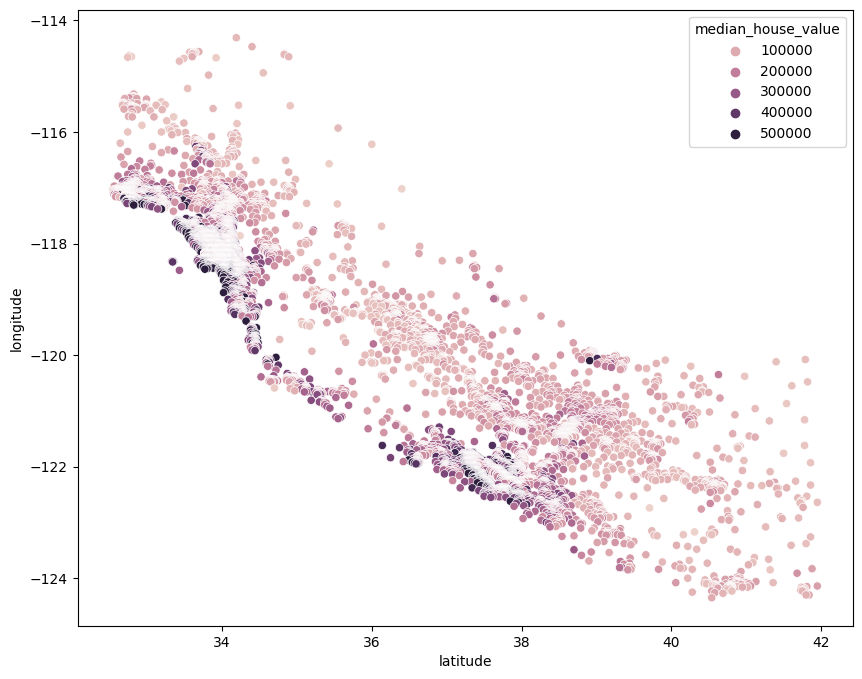

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x="latitude", y="longitude",  hue="median_house_value")

# Гистограмма
Способ представления табличных данных в графическом виде — в виде столбчатой диаграммы. По оси **x** обычно указывают значение, а по оси **y** - встречаемость(кол-во таких значений в выборке)

<Axes: xlabel='median_income', ylabel='Count'>

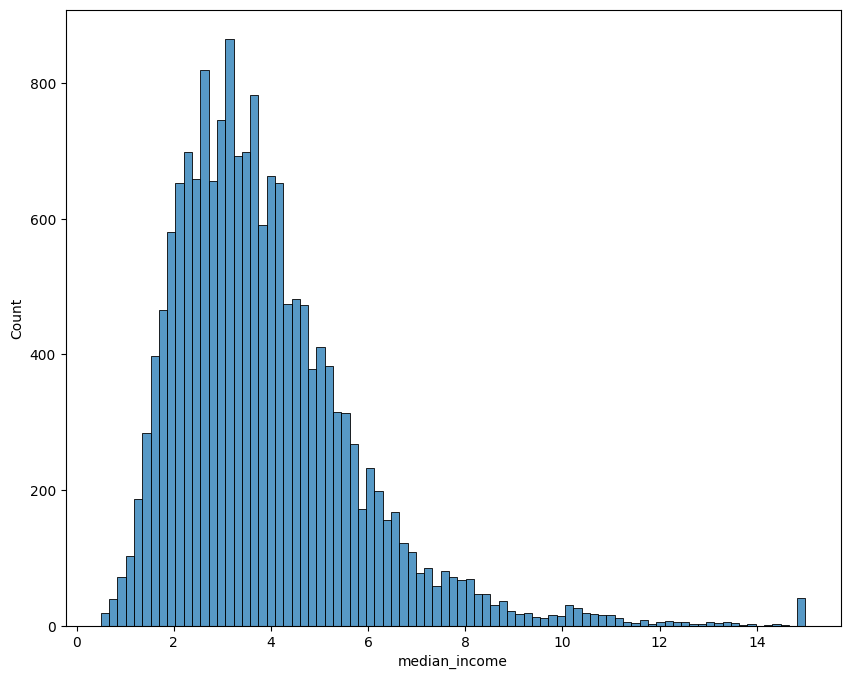

In [ ]:
plt.figure(figsize=(10, 8))
sns.histplot(data=df, x="median_income")

Можно видеть что у большинства семей доход находится между значениями 2 и 6.
И только очень небольшое ко-во людей обладают доходом > 10

<Axes: xlabel='housing_median_age', ylabel='Count'>

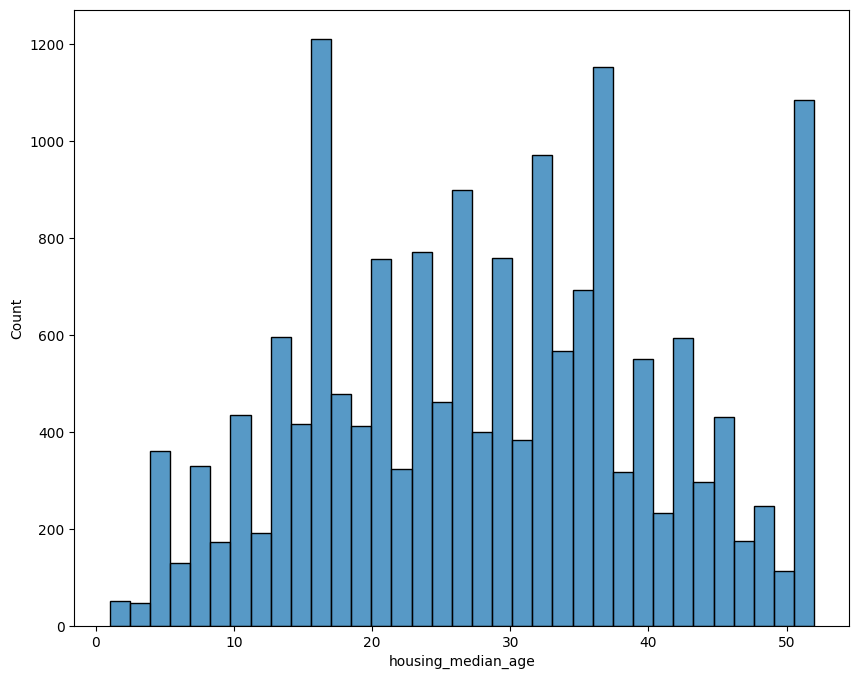

In [17]:
# Самостоятельная работа №5
# Изобраить гистограмму по housing_median_age
plt.figure(figsize=(10, 8))
sns.histplot(data=df, x="housing_median_age")

Распределение по возрасту более равномерное. Большую часть жителей составляют люди в возрасте от 20 до 40 лет. Но и молодежи не мало. Также очень много пожилых людей > 50 лет медианный возраст.

Давайте посмотрим медианный доход у пожилых жителей

<Axes: xlabel='median_income', ylabel='Count'>

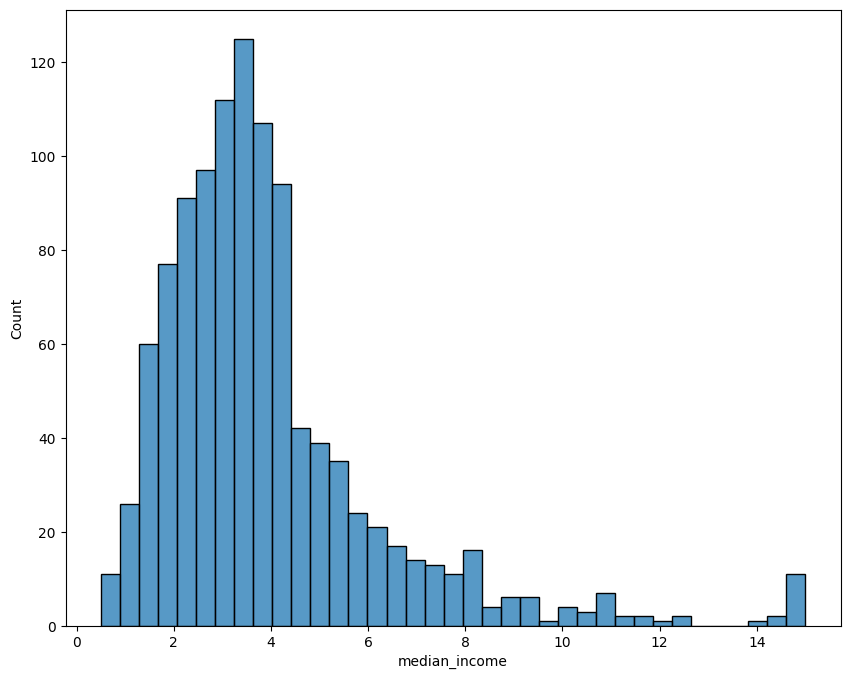

In [20]:
plt.figure(figsize=(10, 8))

sns.histplot(data=df[df['housing_median_age']>50], x="median_income")

Большого отличия от популяции в целом не наблюдается. Скорее всего это местные жители.

Разобьем возрастные группы на 3 категории те кто моложе 20 лет, от 20 до 50 и от 50, чтобы посмотреть влияет ли это на доход.

In [19]:
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -114.31     34.19                15.0       5612.0          1283.0   
1    -114.47     34.40                19.0       7650.0          1901.0   
2    -114.56     33.69                17.0        720.0           174.0   
3    -114.57     33.64                14.0       1501.0           337.0   
4    -114.57     33.57                20.0       1454.0           326.0   

   population  households  median_income  median_house_value  
0      1015.0       472.0         1.4936             66900.0  
1      1129.0       463.0         1.8200             80100.0  
2       333.0       117.0         1.6509             85700.0  
3       515.0       226.0         3.1917             73400.0  
4       624.0       262.0         1.9250             65500.0

In [22]:
df.loc[df['housing_median_age'] <= 20, 'age_group'] = 'Молодые'
df.loc[(df['housing_median_age'] > 20) & (df['housing_median_age'] <= 50), 'age_group'] = 'Ср. возраст'
df.loc[df['housing_median_age'] > 50, 'age_group'] = 'Пожилые'

In [ ]:
df.head(15)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0     -114.31     34.19                15.0       5612.0          1283.0   
1     -114.47     34.40                19.0       7650.0          1901.0   
2     -114.56     33.69                17.0        720.0           174.0   
3     -114.57     33.64                14.0       1501.0           337.0   
4     -114.57     33.57                20.0       1454.0           326.0   
5     -114.58     33.63                29.0       1387.0           236.0   
6     -114.58     33.61                25.0       2907.0           680.0   
7     -114.59     34.83                41.0        812.0           168.0   
8     -114.59     33.61                34.0       4789.0          1175.0   
9     -114.60     34.83                46.0       1497.0           309.0   
10    -114.60     33.62                16.0       3741.0           801.0   
11    -114.60     33.60                21.0       1988.0           483.0   
12    -114.61     34.84                48.0       1291.0           248.0   
13    -114.61     34.83                31.0       2478.0           464.0   
14    -114.63     32.76                15.0       1448.0           378.0   

    population  households  median_income  median_house_value    age_group  
0       1015.0       472.0         1.4936             66900.0      Молодые  
1       1129.0       463.0         1.8200             80100.0      Молодые  
2        333.0       117.0         1.6509             85700.0      Молодые  
3        515.0       226.0         3.1917             73400.0      Молодые  
4        624.0       262.0         1.9250             65500.0      Молодые  
5        671.0       239.0         3.3438             74000.0  Ср. возраст  
6       1841.0       633.0         2.6768             82400.0  Ср. возраст  
7        375.0       158.0         1.7083             48500.0  Ср. возраст  
8       3134.0      1056.0         2.1782             58400.0  Ср. возраст  
9        787.0       271.0         2.1908             48100.0  Ср. возраст  
10      2434.0       824.0         2.6797             86500.0      Молодые  
11      1182.0       437.0         1.6250             62000.0  Ср. возраст  
12       580.0       211.0         2.1571             48600.0  Ср. возраст  
13      1346.0       479.0         3.2120             70400.0  Ср. возраст  
14       949.0       300.0         0.8585             45000.0      Молодые

Применим group_by, чтобы получить среднее значение
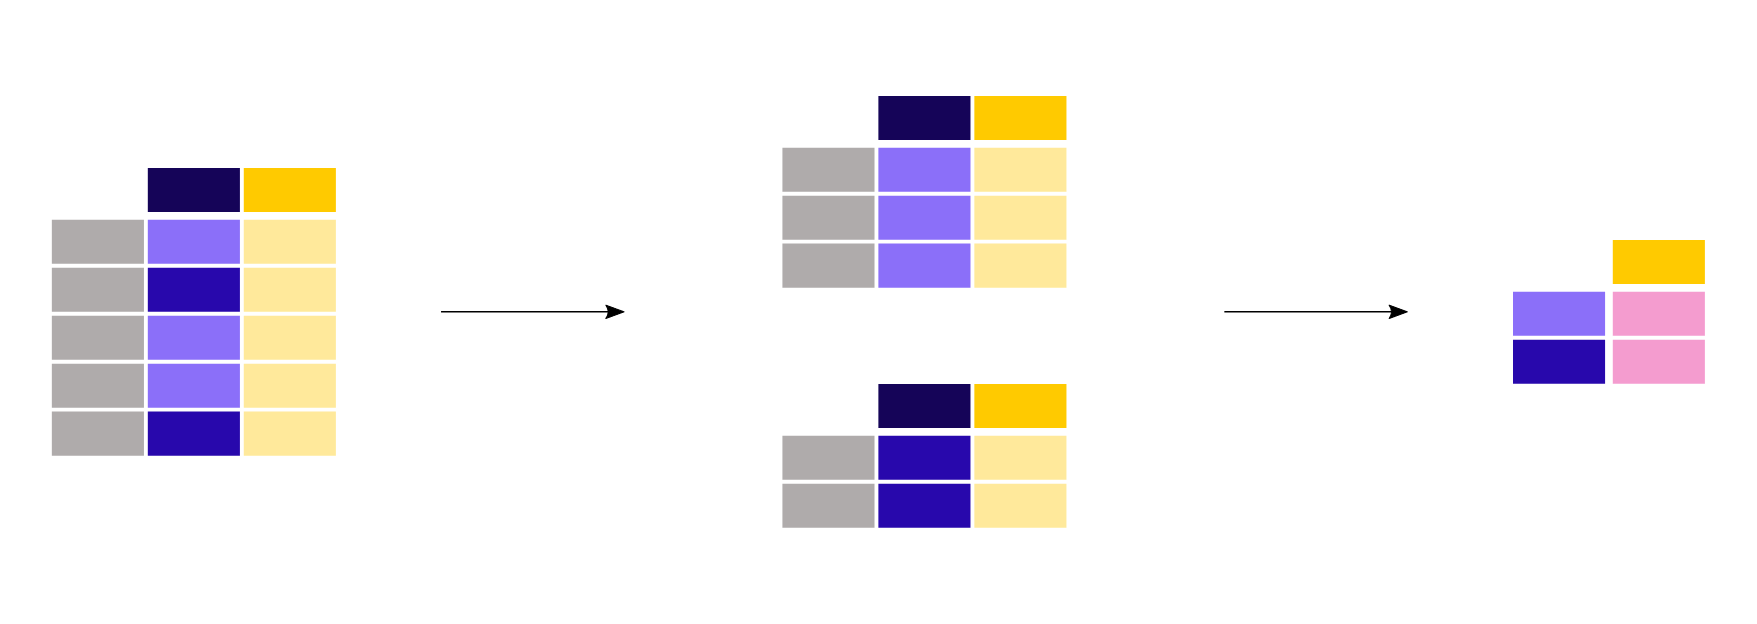

<Axes: xlabel='age_group'>

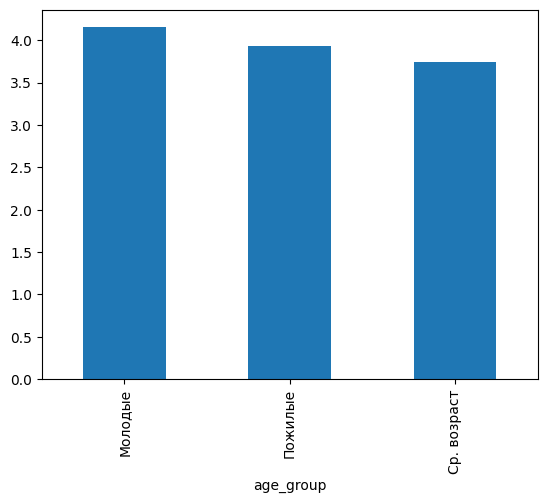

In [23]:
df.groupby('age_group')['median_income'].mean().plot(kind='bar')

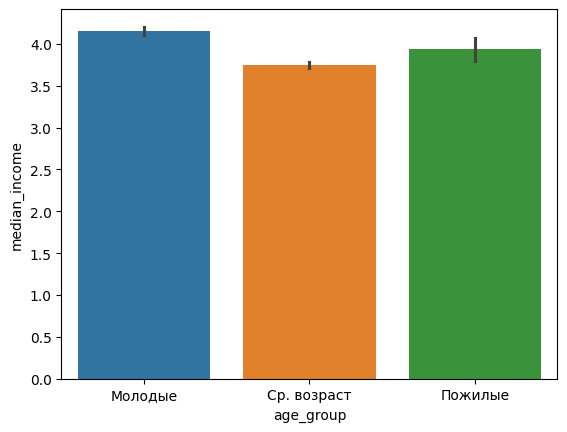

In [24]:
sns.barplot(x="age_group", y="median_income", data=df, hue= 'age_group');

Молодые оказываются самой богатой группой населения. Но отличие в доходе не значительное.

**Seaborn** так же позволяет нам смотреть распределение по многим параметрам.
Давайте поделим группы по доходам на 2. Те у кого медианный доход выше 6 и те у кого меньше. Изобразим дополнительное измерение с помощью оттенка в виде возрастных групп и групп по доходам.


In [25]:
df.head(2)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -114.31     34.19                15.0       5612.0          1283.0   
1    -114.47     34.40                19.0       7650.0          1901.0   

   population  households  median_income  median_house_value age_group  
0      1015.0       472.0         1.4936             66900.0   Молодые  
1      1129.0       463.0         1.8200             80100.0   Молодые

In [26]:
df.loc[df['median_income'] > 6, 'income_group'] = 'rich'
df.loc[df['median_income'] < 6, 'income_group'] = 'everyone_else'

In [27]:
df.head(2)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -114.31     34.19                15.0       5612.0          1283.0   
1    -114.47     34.40                19.0       7650.0          1901.0   

   population  households  median_income  median_house_value age_group  \
0      1015.0       472.0         1.4936             66900.0   Молодые   
1      1129.0       463.0         1.8200             80100.0   Молодые   

    income_group  
0  everyone_else  
1  everyone_else

<Axes: xlabel='median_house_value', ylabel='Count'>

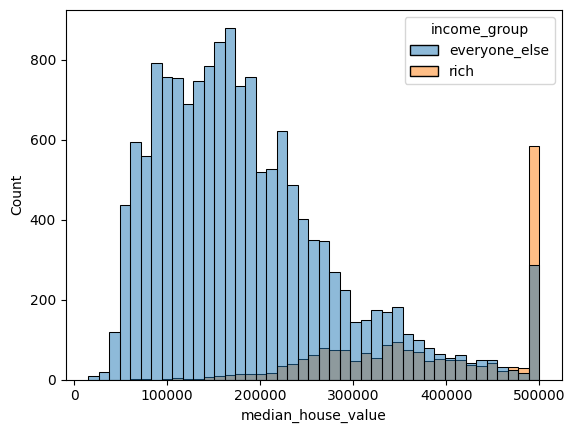

In [ ]:
sns.histplot(df, x="median_house_value", hue="income_group")

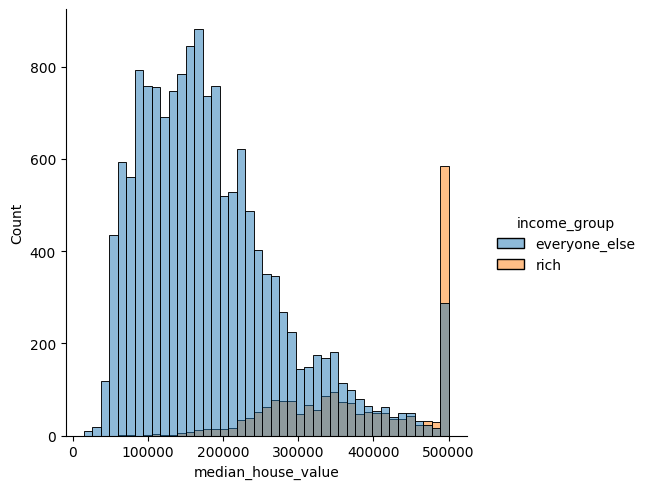

In [29]:
sns.displot(df, x="median_house_value", hue="income_group")

<Axes: xlabel='median_house_value', ylabel='Count'>

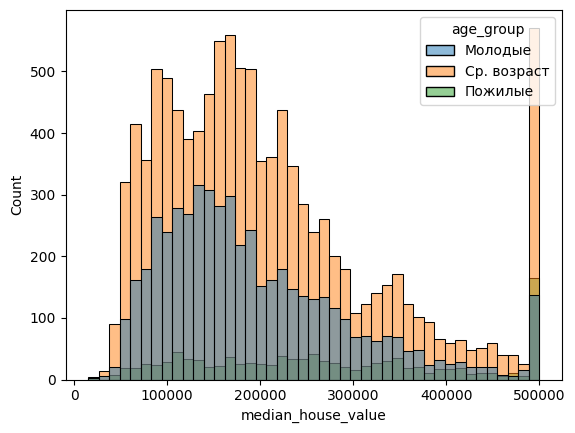

In [30]:
# Самостоятельная работа
# Изобразить гистограмму по median_house_value с оттенком age_group
sns.histplot(df, x="median_house_value", hue="age_group")

# Heatmaps(Корелляция)
Посмотрим как данные коррелируют между собой.

In [35]:
corr = df.corr()

<Axes: >

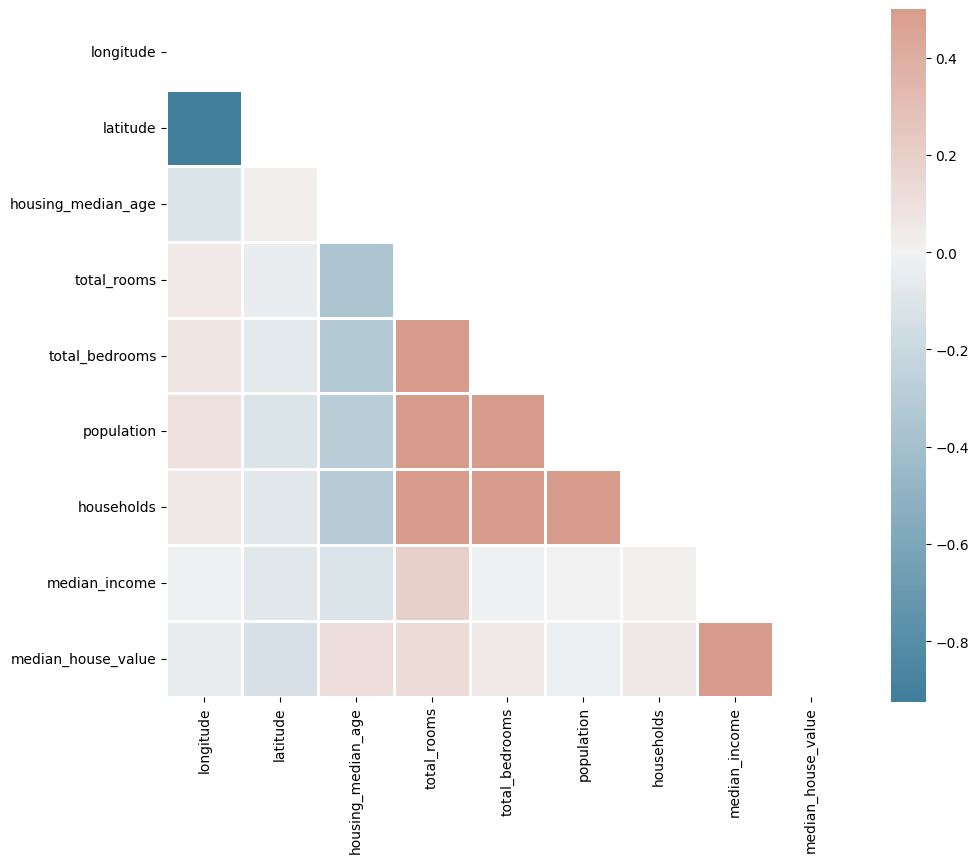

In [ ]:
mask = np.triu(np.ones_like(corr, dtype=bool))

# Создаем полотно для отображения большого графика
f, ax = plt.subplots(figsize=(11, 9))

# Создаем цветовую политру
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Визуализируем данные кореляции
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.5, center=0,
            square=True, linewidths=.8, cbar_kws={"shrink": 1})

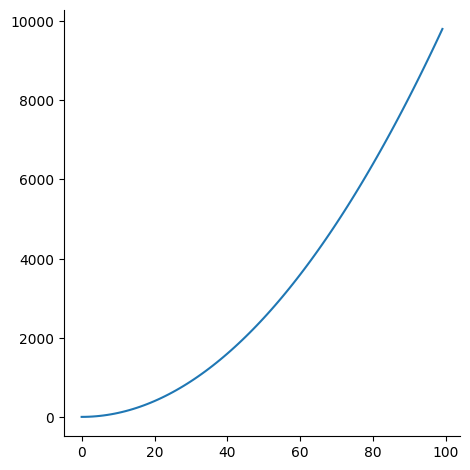

In [36]:


# Создаем данные
x1 = [i for i in range(100)]
y1 = [i*i for i in x1]



sns.relplot(x=x1 ,y=y1, kind="line")

# Выводы

Анализ данных должен предоставлять информацию и инсайт, которые не видные невооруженным взглядом. В этом и есть красота аналитики. В данном случае можно сделать следующий выводы. Стоимость домов напрямую зависит от их расположения, в определенной полосе(скорее всего побережье) цена на дома высокая. Чем выше доход, тем больше шанс, что человек проживает в богатом районе. Возраст никак не коррелирует с доходом. Распределение по возрастам примерно одинаковое во всех группах доходов. Ну и из очевидно чем больше людей, тем больше семей, и соответственно комнат и спален.

# Самостоятельная работа
Написать **EDA** для датасета про пингвинов

### Необходимо:


*   Использовать 2-3 точечных графика
*   Применить доп измерение в точечных графиках, используя аргументы **hue**, **size**, **stile**
*   Использовать **PairGrid** с типом графика на ваш выбор
*   Изобразить **Heatmap**
*   Использовать 2-3 гистограммы




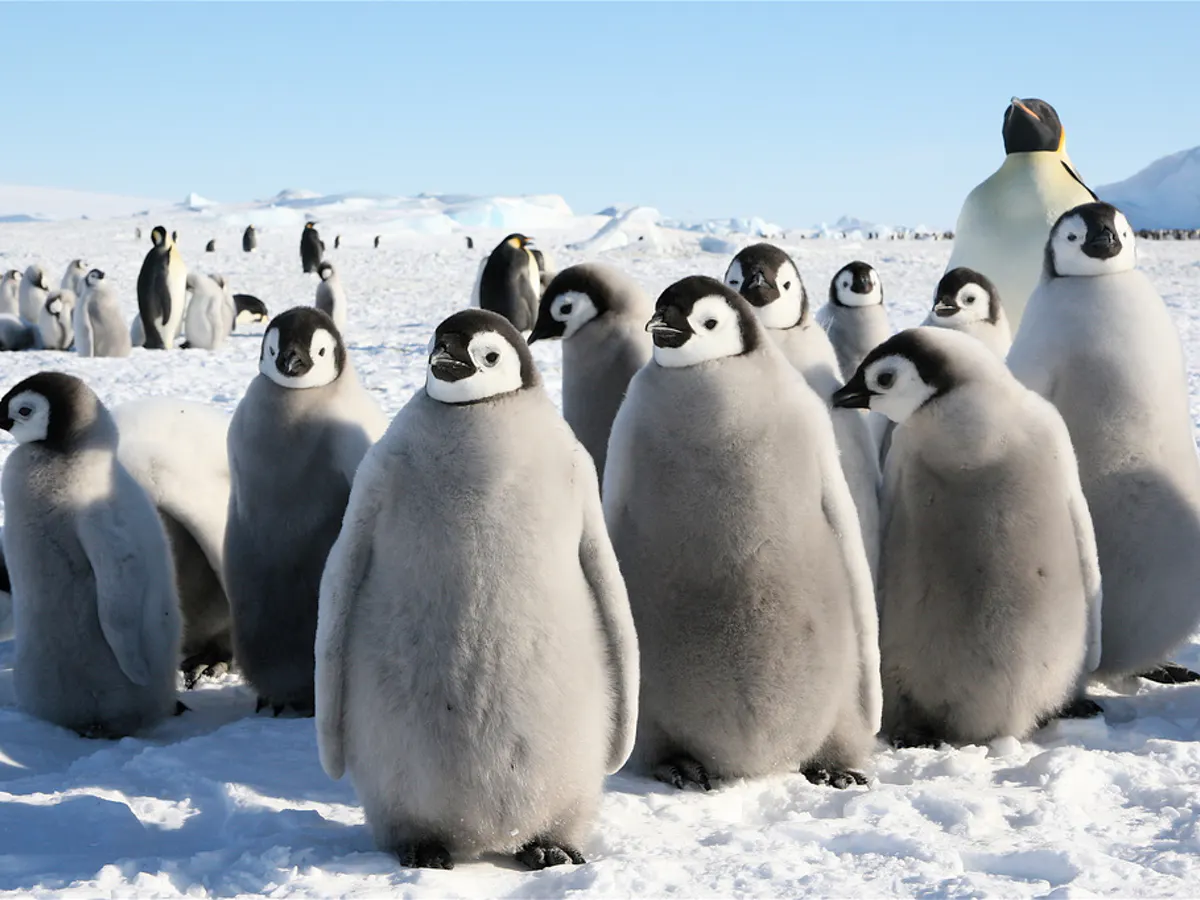

In [37]:
penguins = sns.load_dataset("penguins")

In [38]:
penguins.head()


species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female

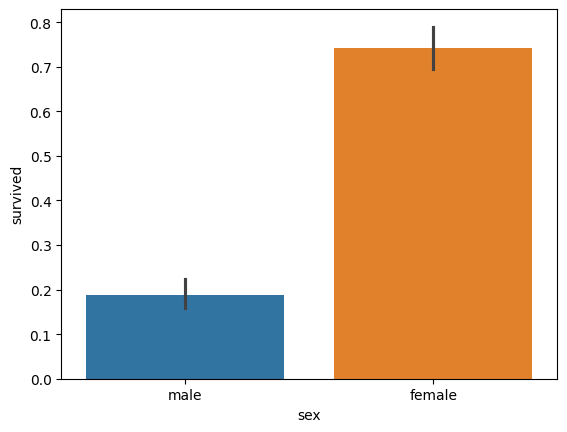

In [39]:
# Первые 5 строк датасета про пингвинов
titanic_dataset = sns.load_dataset("titanic")
sns.barplot(x="sex", y="survived", data=titanic_dataset, hue= 'sex');

In [ ]:
titanic_dataset.head(2)

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False

In [56]:
import random
lst = ['robot'] * 10
lst += ['human'] * 10
random.shuffle(lst)
data = pd.DataFrame({'whoAmI':lst})
#lambda x: x[0] * x[1] if x[0] != x[1] else 0
#Вызываемый объект, который возвращает логическую серию
#df.loc[lambda df: df['shield'] == 8]
#data.loc[lambda data:
data['robot']=0
data['human']=0
data.loc[data['whoAmI'] == 'robot','robot'] = 1
data.loc[data['whoAmI'] == 'human', 'human'] = 1
data
#pd.get_dummies(data['whoAmI'])
# data['tmp'] = 1
# data.set_index([data.index, 'whoAmI'], inplace=True)
# data = data.unstack(level=-1, fill_value = 0).astype(int)
# data.columns = data.columns.droplevel()
# data.columns.name = None
# data

whoAmI  robot  human
0   human      0      1
1   human      0      1
2   robot      1      0
3   robot      1      0
4   human      0      1
5   human      0      1
6   robot      1      0
7   robot      1      0
8   robot      1      0
9   human      0      1
10  robot      1      0
11  human      0      1
12  robot      1      0
13  human      0      1
14  robot      1      0
15  human      0      1
16  robot      1      0
17  robot      1      0
18  human      0      1
19  human      0      1